In [1]:
import tensorflow as tf
import numpy as np

**name_scope**和**variable_scope**的区别

variable scope是为了实现tensorflow中变量共享机制，即为使得在代码的任何部分都可以使用某一个已经创建的变量，TF引入了变量共享机制，使得可以轻松的共享变量，而不用传一个变量。其中变量共享机制是通过tf.get_variable()和tf.variable_scope()两者搭配使用来实现的。
``` python
import tensorflow as tf
with tf.variable_scope('shared_variable'):
    var_1 = tf.get_variable('var_1', shape=[1, ])
with tf.variable_scope('shared_variable', reuse=True):
    var_2 = tf.get_variable('var_1', shape=[1, ])
print(var_1.name)
print(var_2.name)
> shared_variable/var_1:0
> shared_variable/var_1:0
```


In [3]:
with tf.variable_scope('shared_variable'):
    var_1 = tf.get_variable('var_1', shape=[1, ])
with tf.variable_scope('shared_variable', reuse=True):
    var_2 = tf.get_variable('var_1', shape=[1, ])
print(var_1.name)
print(var_2.name)

shared_variable/var_1:0
shared_variable/var_1:0


**tf.random_normal()函数**

tf.random_normal()函数用于从“服从指定正态分布的序列”中随机取出指定个数的值。

In [19]:
def add_layer(inputs, in_size, out_size, n_layer, activation_function=None):
    layer_name = "layer%s" % n_layer
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            weights = tf.Variable(tf.random_normal([in_size, out_size]), name='w')
            tf.summary.histogram(layer_name+'/weights', weights)  # 可以将其分布情况以直方图的形式在tensorboard直方图仪表板上显示
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
            tf.summary.histogram(layer_name + '/biases', biases)
        with tf.name_scope('wx_plus_b'):
            wx_plus_b = tf.add(tf.matmul(inputs, weights), biases)
        if activation_function is None:
            outputs = wx_plus_b
        else:
            outputs = activation_function(wx_plus_b)
        return outputs

In [12]:
x_data = np.linspace(-1, 1, 300)
x_data

array([-1.        , -0.99331104, -0.98662207, -0.97993311, -0.97324415,
       -0.96655518, -0.95986622, -0.95317726, -0.94648829, -0.93979933,
       -0.93311037, -0.9264214 , -0.91973244, -0.91304348, -0.90635452,
       -0.89966555, -0.89297659, -0.88628763, -0.87959866, -0.8729097 ,
       -0.86622074, -0.85953177, -0.85284281, -0.84615385, -0.83946488,
       -0.83277592, -0.82608696, -0.81939799, -0.81270903, -0.80602007,
       -0.7993311 , -0.79264214, -0.78595318, -0.77926421, -0.77257525,
       -0.76588629, -0.75919732, -0.75250836, -0.7458194 , -0.73913043,
       -0.73244147, -0.72575251, -0.71906355, -0.71237458, -0.70568562,
       -0.69899666, -0.69230769, -0.68561873, -0.67892977, -0.6722408 ,
       -0.66555184, -0.65886288, -0.65217391, -0.64548495, -0.63879599,
       -0.63210702, -0.62541806, -0.6187291 , -0.61204013, -0.60535117,
       -0.59866221, -0.59197324, -0.58528428, -0.57859532, -0.57190635,
       -0.56521739, -0.55852843, -0.55183946, -0.5451505 , -0.53

In [11]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
x_data

array([[-1.        ],
       [-0.99331104],
       [-0.98662207],
       [-0.97993311],
       [-0.97324415],
       [-0.96655518],
       [-0.95986622],
       [-0.95317726],
       [-0.94648829],
       [-0.93979933],
       [-0.93311037],
       [-0.9264214 ],
       [-0.91973244],
       [-0.91304348],
       [-0.90635452],
       [-0.89966555],
       [-0.89297659],
       [-0.88628763],
       [-0.87959866],
       [-0.8729097 ],
       [-0.86622074],
       [-0.85953177],
       [-0.85284281],
       [-0.84615385],
       [-0.83946488],
       [-0.83277592],
       [-0.82608696],
       [-0.81939799],
       [-0.81270903],
       [-0.80602007],
       [-0.7993311 ],
       [-0.79264214],
       [-0.78595318],
       [-0.77926421],
       [-0.77257525],
       [-0.76588629],
       [-0.75919732],
       [-0.75250836],
       [-0.7458194 ],
       [-0.73913043],
       [-0.73244147],
       [-0.72575251],
       [-0.71906355],
       [-0.71237458],
       [-0.70568562],
       [-0

In [13]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [14]:
import matplotlib.pyplot as plt

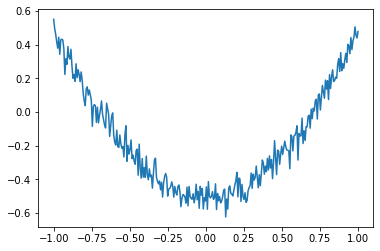

In [15]:
plt.plot(x_data, y_data)

In [20]:
with tf.name_scope('input'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')  # 其中None表示可以给多个samples
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

l1 = add_layer(xs, 1, 10, 1, activation_function=tf.nn.relu)

prediction = add_layer(l1, 10, 1, 2, activation_function=None)

In [21]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
    tf.summary.scalar('loss', loss)  # 绘制损失

In [22]:
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('logs', sess.graph)
    sess.run(init)
    for i in range(1000):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
        if i % 50 == 0:
            result = sess.run(merged, feed_dict={xs:x_data, ys:y_data})
            writer.add_summary(result, i)  # 可以调用add_summary方法将训练过程数据保存在filewriter指定的文件中 ，summary, global_step=step